<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_EnsembleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Ensemble Accuracy: 0.6325878594249201
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70       394
           1       0.50      0.56      0.53       232

    accuracy                           0.63       626
   macro avg       0.61      0.62      0.61       626
weighted avg       0.64      0.63      0.64       626



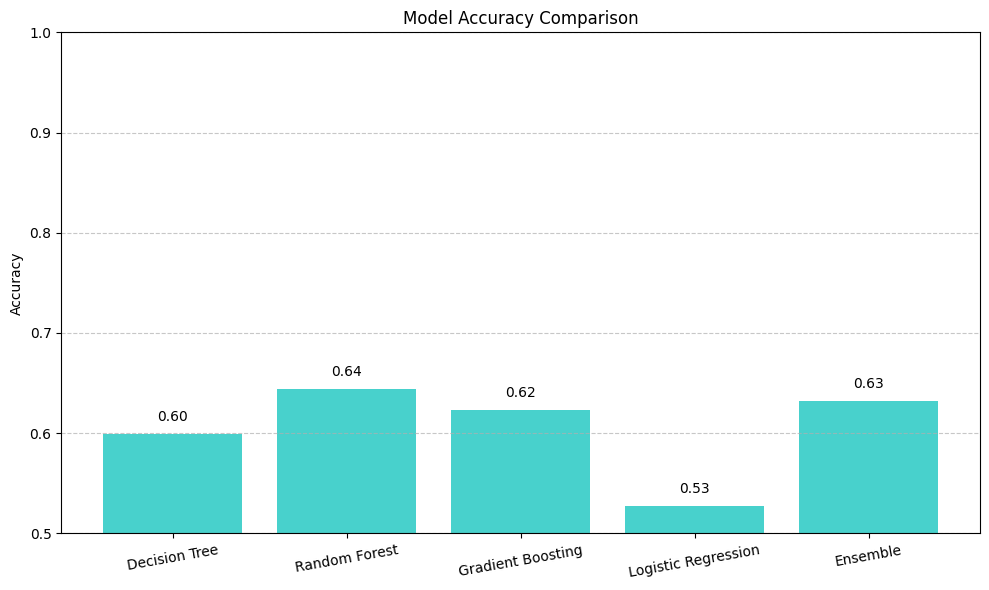

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("cleaned_data.csv")

# Feature engineering
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define individual models
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.08, max_depth=4, random_state=42)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
dt_model.fit(X_resampled, y_resampled)
rf_model.fit(X_resampled, y_resampled)
gb_model.fit(X_resampled, y_resampled)
log_reg_model.fit(X_resampled, y_resampled)

# Train ensemble (Voting Classifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('dt', dt_model),
        ('rf', rf_model),
        ('gb', gb_model),
        ('logreg', log_reg_model)
    ],
    voting='soft'  # Use soft voting for better probability-based averaging
)

ensemble_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Ensemble Accuracy:", ensemble_accuracy)
print("✅ Classification Report:\n", report)

# Accuracy plot for individual models and ensemble
accuracies = [
    accuracy_score(y_test, dt_model.predict(X_test_scaled)),
    accuracy_score(y_test, rf_model.predict(X_test_scaled)),
    accuracy_score(y_test, gb_model.predict(X_test_scaled)),
    accuracy_score(y_test, log_reg_model.predict(X_test_scaled)),
    ensemble_accuracy
]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Ensemble']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='mediumturquoise')
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



✅ Total Ensemble Accuracy: 0.6534
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       394
           1       0.54      0.49      0.51       232

    accuracy                           0.65       626
   macro avg       0.62      0.62      0.62       626
weighted avg       0.65      0.65      0.65       626



<ipython-input-4-cd88f0e63768>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


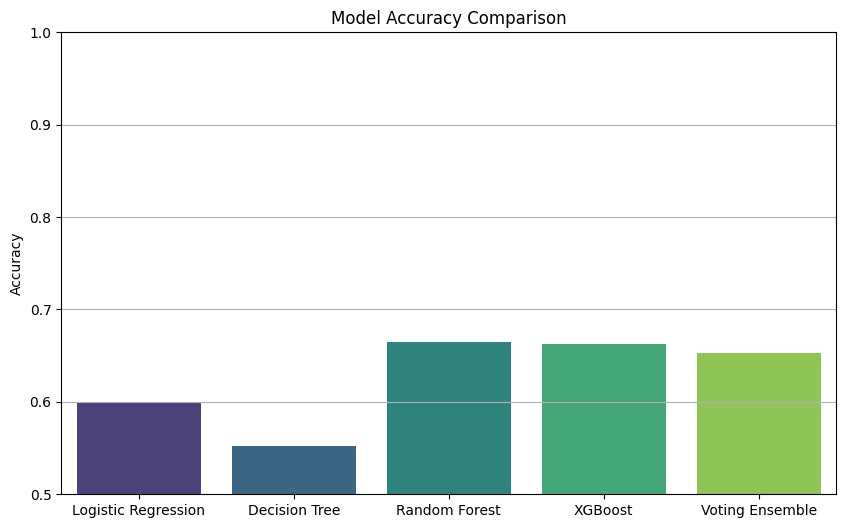

In [4]:
# Install dependencies
!pip install xgboost imbalanced-learn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("cleaned_data.csv")

# Feature engineering
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Define features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_poly, y_train)

# Base models
log_reg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Fit base models
log_reg.fit(X_resampled, y_resampled)
dt.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
xgb.fit(X_resampled, y_resampled)

# Voting Classifier Ensemble
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('xgb', xgb)
], voting='hard')

ensemble.fit(X_resampled, y_resampled)
y_pred_ensemble = ensemble.predict(X_test_poly)

# Accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\n✅ Total Ensemble Accuracy: {ensemble_accuracy:.4f}")
print("✅ Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# Accuracy comparison
accuracies = {
    'Logistic Regression': accuracy_score(y_test, log_reg.predict(X_test_poly)),
    'Decision Tree': accuracy_score(y_test, dt.predict(X_test_poly)),
    'Random Forest': accuracy_score(y_test, rf.predict(X_test_poly)),
    'XGBoost': accuracy_score(y_test, xgb.predict(X_test_poly)),
    'Voting Ensemble': ensemble_accuracy
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.show()
